In [1]:
%pip install langchain langchain_community langchain_openai langgraph

Note: you may need to restart the kernel to use updated packages.


In [1]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.graph import MessagesState, StateGraph, START, END
from IPython.display import display, Image
from langchain_openai import ChatOpenAI


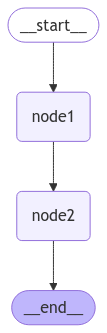

Node 1 : 
{'messages': [HumanMessage(content='Hello, World!', additional_kwargs={}, response_metadata={}, id='9b0c5143-a811-4d2b-bca0-04115c05327c')]}
Node 2
{'messages': [HumanMessage(content='Hello, World!', additional_kwargs={}, response_metadata={}, id='9b0c5143-a811-4d2b-bca0-04115c05327c'), HumanMessage(content='Who is Linus sebastian', additional_kwargs={}, response_metadata={}, id='6b773fd5-4789-4807-b193-ff3b2ffedfab')]}
content="Hello!\n\nLinus Sebastian is a Canadian YouTube personality and entrepreneur. He was born on April 1, 1985, in Toronto, Ontario, Canada.\n\nLinus is best known for his YouTube channel, Linus Tech Tips (LTT), which he founded in 2008. The channel focuses on technology news, reviews, and tutorials, with a strong emphasis on PC hardware, gaming, and computer building.\n\nOn LTT, Linus shares his expertise and passion for technology, often featuring in-depth reviews of computer components, such as graphics cards, processors, and motherboards. He also crea

{'messages': [HumanMessage(content='Hello, World!', additional_kwargs={}, response_metadata={}, id='9b0c5143-a811-4d2b-bca0-04115c05327c'),
  HumanMessage(content='Who is Linus sebastian', additional_kwargs={}, response_metadata={}, id='6b773fd5-4789-4807-b193-ff3b2ffedfab'),
  AIMessage(content="Hello!\n\nLinus Sebastian is a Canadian YouTube personality and entrepreneur. He was born on April 1, 1985, in Toronto, Ontario, Canada.\n\nLinus is best known for his YouTube channel, Linus Tech Tips (LTT), which he founded in 2008. The channel focuses on technology news, reviews, and tutorials, with a strong emphasis on PC hardware, gaming, and computer building.\n\nOn LTT, Linus shares his expertise and passion for technology, often featuring in-depth reviews of computer components, such as graphics cards, processors, and motherboards. He also creates content around PC building, overclocking, and cooling systems.\n\nOver the years, Linus has become one of the most popular and influential te

In [3]:

class State(MessagesState):
    pass

    
llm = ChatOpenAI(temperature=0, model="llama3.2", base_url="http://localhost:11434/v1", api_key="llama3.2")

def node_1(state: State):
    print("Node 1 : ")
    print(state)
    return {"messages": [HumanMessage(content="Who is Linus sebastian")]}

def node_2(state: State):
    print("Node 2")
    print(state)
    res = llm.invoke(state["messages"])
    print(res)
    return {"messages": [res]}

builder = StateGraph(State)

builder.add_node("node1",node_1)
builder.add_node("node2", node_2)
builder.add_edge("node1","node2")
builder.add_edge(START, "node1")
builder.add_edge("node2", END)
c = builder.compile()

display(Image(c.get_graph().draw_mermaid_png()))
response = c.invoke({"messages": HumanMessage(content="Hello, World!")})

response